# Assessing Galactic RM from the Oppermann+14 map

In [11]:
%matplotlib inline

In [19]:
# imports
from pkg_resources import resource_filename
import numpy as np

from astropy.io import fits
from astropy.coordinates import SkyCoord

import healpy as hp

## Load map

In [4]:
fg_file = resource_filename('frb', 'data/RM/opp14_foreground.fits')

In [5]:
hdu = fits.open(fg_file)
hdu.info()

Filename: /home/xavier/Projects/FRB/frb/data/RM/opp14_foreground.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  angspec       1 BinTableHDU     12   384R x 1C   [D]   
  2  profile       1 BinTableHDU     17   196608R x 1C   [E]   
  3  maps/s        1 BinTableHDU     17   196608R x 1C   [E]   
  4  maps/phi      1 BinTableHDU     17   196608R x 1C   [E]   
  5  uncertainty/s    1 BinTableHDU     17   196608R x 1C   [E]   
  6  uncertainty/phi    1 BinTableHDU     17   196608R x 1C   [E]   


In [7]:
rm_sky = hp.read_map(fg_file, hdu=4)

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [27]:
sig_sky = hp.read_map(fg_file, hdu=6)

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


## HealPix time

### View

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


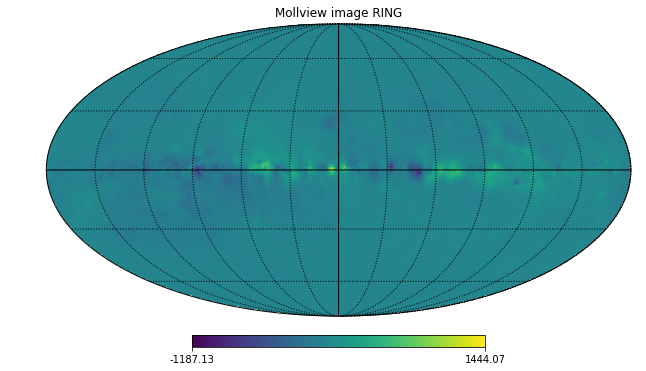

In [12]:
hp.mollview(rm_sky, title="Mollview image RING")
hp.graticule()

### Query a Coordinate

In [14]:
repeater_coord = SkyCoord('05h31m58.698s +33d8m52.59s', frame='icrs')

In [33]:
pix = hp.ang2pix(128, repeater_coord.galactic.l.value, repeater_coord.galactic.b.value, lonlat=True)
pix

98809

In [31]:
rm_sky[pix] # rad/m^2

-17.727994918823242

In [32]:
sig_sky[pix]

76.4303970336914